In [1]:
using Printf

In [3]:
using Plots

Wyniki ogólnie:  
A: I_c i I_s w miarę się liczą  
B: I_c daje bardzo zły wynik, I_s liczy się jak w A  
C: I_c zbiega znacznie lepiej niż w A, I_s jak w A  
D: dziwne wyniki  

In [1]:
# przybliżone wartości całek I_c i I_s, źródło: Wolfram Alpha
Int_C_exact_value = 1.809048475800544162949576733665114291615983641191003479196640074902159185352954615877833522127454977
Int_S_exact_value = 0.6205366034467622036163048463307930151490187776648934354652171212875447590052889374947286820148085157

0.6205366034467622

In [16]:
# badane funkcje zmodyfikowane zgodnie z podpunktem A
# funkcje C i S przyjmują wartość 0 w x=0
function C(x)
    if( x == 0)
        return 0;
    else
        return cos(x)/sqrt(x);
    end
end

function S(x)
    if(x == 0)
        return 0;
    else
        return sin(x)/sqrt(x);
    end
end

S (generic function with 1 method)

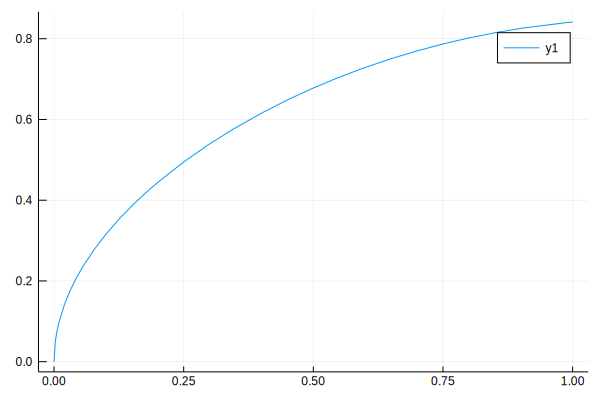

In [8]:
# Wykres funkcji S na badanym przedziale
plot(S, 0, 1)

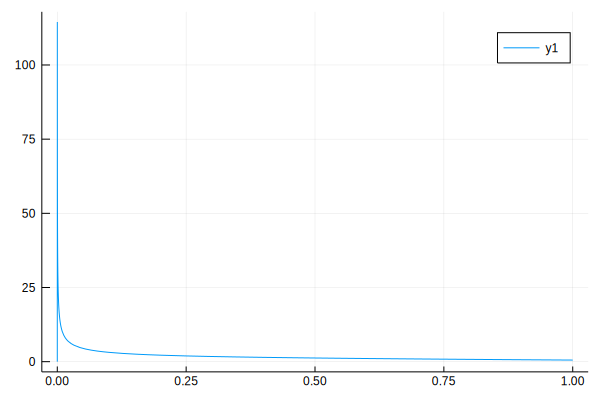

In [9]:
# Wykres funkcji C na badanym przedziale
plot(C, 0, 1)

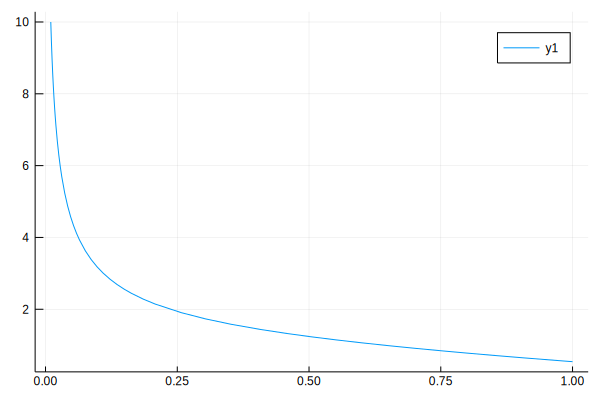

In [10]:
# Wykres funkcji C na przedziale [0.01, 1]
plot(C, 0.01, 1)

Metoda trapezów:

In [15]:
# Całkowanie funkcji f na przedziale [left,right] 
# metodą trapezów z points równoodległymi punktami
function int_trapez(f, left, right, points)
    width = (right-left)/(points-1);
    sum = (f(left)+f(right))*0.5;
    
    for i in 1:(points-1)
        sum += f(left + i*width);
    end
    
    sum *= width;
    return sum;
end

int_trapez (generic function with 1 method)

Podpunkt A

In [7]:
# Podpunkt A, interpretacja 1.
#następna iteracja liczy się długo
@printf("funkcja C:\n");
@printf("%f\n",int_trapez(C,0.0,1.0,1001001));
@printf("%f\n",int_trapez(C,0.0,1.0,1001001001));
@printf("funkcja S:\n");
@printf("%f\n",int_trapez(S,0.0,1.0,1001001));
@printf("%f\n",int_trapez(S,0.0,1.0,1001001001));

funkcja C:
1.807589
1.809002
funkcja S:
0.620537
0.620537


In [16]:
#Podpunkt A, interpretacjacja 2.
max_iter = 20;
n=1e7;

@printf("funkcja C: n,wartość\n");
for i in 0:max_iter
    n += 1e7;
    p = n + 1001;
    @printf("%d,%.16f\n",p,int_trapez(C,0.0,1.0,p));
end



funkcja C: n,wartość
20001001,1.8087219657818649
30001001,1.8087818752182052
40001001,1.8088175898716068
50001001,1.8088419633565658
60001001,1.8088599554201279
70001001,1.8088739390168904
80001001,1.8088852109765532
90001001,1.8088945477772005
100001001,1.8089024464831931
110001001,1.8089092420064972
120001001,1.8089151693408991
130001001,1.8089203988860529
140001001,1.8089250576179496
150001001,1.8089292423539365
160001001,1.8089330283785949
170001001,1.8089364752299140
180001001,1.8089396307061936
190001001,1.8089425336717615
200001001,1.8089452161022070
210001001,1.8089477045781208
220001001,1.8089500213994563


In [21]:
#Podpunkt A, interpretacjacja 2.
max_iter = 20;
n = 1e7;

@printf("funkcja S: n,wartość\n");
for i in 0:max_iter
    n += 1e7;
    p = n + 1001;
    @printf("%d,%.16f\n",p,int_trapez(S,0.0,1.0,p));
end

funkcja S: n,wartość
20001001,0.6205366455158494
30001001,0.6205366314935752
40001001,0.6205366244823041
50001001,0.6205366202754711
60001001,0.6205366174705206
70001001,0.6205366154672504
80001001,0.6205366139647847
90001001,0.6205366127960877
100001001,0.6205366118610619
110001001,0.6205366110963603
120001001,0.6205366104587469
130001001,0.6205366099194770
140001001,0.6205366094570479
150001001,0.6205366090563871
160001001,0.6205366087057353
170001001,0.6205366083963813
180001001,0.6205366081213621
190001001,0.6205366078755483
200001001,0.6205366076539541
210001001,0.6205366074536874
220001001,0.6205366072714777


In [13]:
##
max_iter=20
Arange = [n*1e7 + 1001 for n in 1:max_iter]

20-element Array{Float64,1}:
 1.0001001e7 
 2.0001001e7 
 3.0001001e7 
 4.0001001e7 
 5.0001001e7 
 6.0001001e7 
 7.0001001e7 
 8.0001001e7 
 9.0001001e7 
 1.00001001e8
 1.10001001e8
 1.20001001e8
 1.30001001e8
 1.40001001e8
 1.50001001e8
 1.60001001e8
 1.70001001e8
 1.80001001e8
 1.90001001e8
 2.00001001e8

In [17]:
AresultsIC = [int_trapez(C,0.0,1.0,p) for p in Arange]

20-element Array{Float64,1}:
 1.8085867482699087
 1.808721965781865 
 1.8087818752182052
 1.8088175898716068
 1.8088419633565658
 1.808859955420128 
 1.8088739390168904
 1.8088852109765532
 1.8088945477772005
 1.808902446483193 
 1.8089092420064972
 1.8089151693408991
 1.808920398886053 
 1.8089250576179496
 1.8089292423539365
 1.808933028378595 
 1.808936475229914 
 1.8089396307061936
 1.8089425336717615
 1.808945216102207 

In [18]:
AresultsIS = [int_trapez(S,0.0,1.0,p) for p in Arange]

20-element Array{Float64,1}:
 0.6205366875788288
 0.6205366455158494
 0.6205366314935752
 0.6205366244823041
 0.6205366202754711
 0.6205366174705206
 0.6205366154672504
 0.6205366139647847
 0.6205366127960877
 0.6205366118610619
 0.6205366110963603
 0.6205366104587469
 0.620536609919477 
 0.6205366094570479
 0.6205366090563871
 0.6205366087057353
 0.6205366083963813
 0.6205366081213621
 0.6205366078755483
 0.6205366076539541

In [19]:
AerrorIC = abs.([x-Int_C_exact_value for x in AresultsIC])

20-element Array{Float64,1}:
 0.00046172753063533634
 0.0003265100186791159 
 0.00026660058233884953
 0.00023088592893727444
 0.0002065124439782906 
 0.00018852038041616836
 0.0001745367836536449 
 0.00016326482399087183
 0.0001539280233435747 
 0.0001460293173509708 
 0.00013923379404690017
 0.00013330645964493293
 0.00012807691449112646
 0.00012341818259442583
 0.00011923344660758062
 0.00011544742194913304
 0.00011200057063009972
 0.00010884509435049594
 0.0001059421287825657 
 0.00010325969833702153

In [27]:
AerrorIS = abs.([x-Int_S_exact_value for x in AresultsIS])

20-element Array{Float64,1}:
 8.41320666467027e-8  
 4.2069087213825185e-8
 2.8046812983184566e-8
 2.1035541863945184e-8
 1.6828708870875175e-8
 1.4023758376779938e-8
 1.2020488160402465e-8
 1.0518022452998821e-8
 9.349325535978892e-9 
 8.414299701442474e-9 
 7.649598066095109e-9 
 7.011984659577308e-9 
 6.472714808580804e-9 
 6.010285713564656e-9 
 5.609624875724251e-9 
 5.258973145849666e-9 
 4.949619047955878e-9 
 4.674599929366252e-9 
 4.428786115617811e-9 
 4.20719192817387e-9  

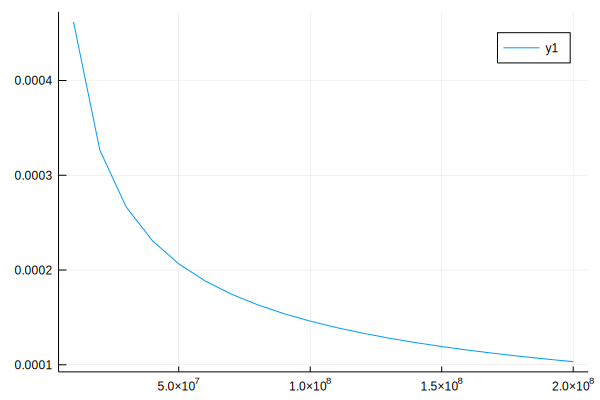

In [41]:
plot(Arange, AerrorIC)

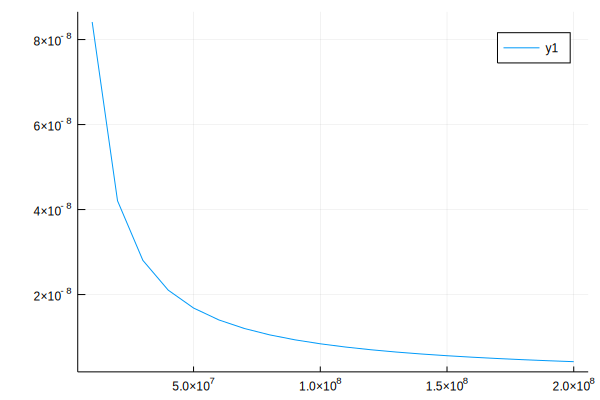

In [32]:
plot(Arange, AerrorIS)

In [36]:
Arel_errorIS = [abs(x/Int_S_exact_value) for x in AerrorIS]
Arel_errorIC = [abs(x/Int_C_exact_value) for x in AerrorIC]

20-element Array{Float64,1}:
 0.00025523225983815147
 0.0001804871583303637 
 0.00014737061273102306
 0.00012762838145346123
 0.0001141552848034679 
 0.00010420968975568436
 9.647988209735976e-5  
 9.024900447657907e-5  
 8.508783783444948e-5  
 8.0721616531779e-5    
 7.696520900872274e-5  
 7.368871615557006e-5  
 7.079794499948355e-5  
 6.82227061603811e-5   
 6.59094812563368e-5   
 6.38166547184674e-5   
 6.191131532864922e-5  
 6.016704129629781e-5  
 5.856234932327281e-5  
 5.7079564046135814e-5 

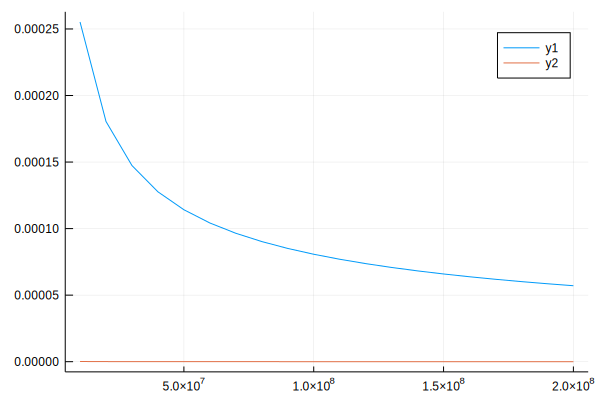

In [35]:
plot(Arange, Arel_errorIC)

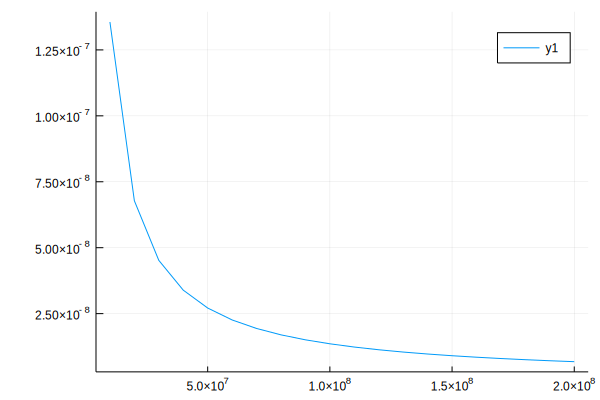

In [37]:
plot(Arange, Arel_errorIS)

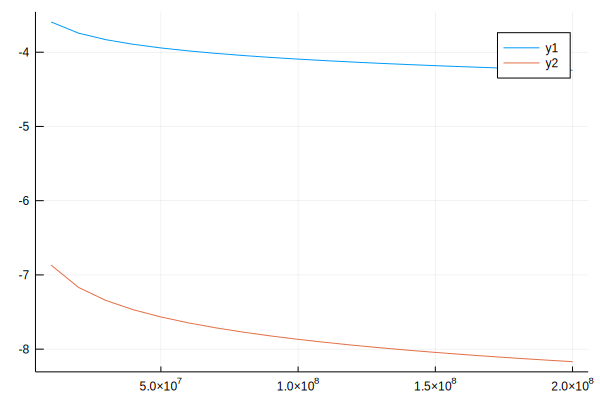

In [40]:
plot(Arange, [log10(x) for x in Arel_errorIC])
plot!(Arange, [log10(x) for x in Arel_errorIS])

Wnioski:  
Metoda poprawnie liczy obie całki, ale lepiej radzi sobie z S  
Prawdopodobnie wynika to z faktu, że funkcja S jest ograniczona 
na badanym przedziale i jej granica w zerze wynosi 0
a funkcja C jest nieograniczona w okolicy 0

Podpunkt B

In [22]:
#Podpunkt B, funkcja C
#Wychodzi wzorek int_trapez(C,h,1.0,p)+(2/3)*sqrt(h)*(2*C(0)+C(h))
max_iter = 20;
n = 1e7;
h = 2e-10;

@printf("funkcja C: n,wartość\n");
for i in 0:max_iter
    n += 1e7;
    p = n + 1001;
    @printf("%d,%.16f\n",p,int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*C(h));
end

funkcja C: n,wartość
20001001,2.4771551444934028
30001001,2.4766255863162878
40001001,2.4763664707487321
50001001,2.4762138824805451
60001001,2.4761138536375649
70001001,2.4760435007256114
80001001,2.4759914915027856
90001001,2.4759515858171852
100001001,2.4759200704620814
110001001,2.4758946008934335
120001001,2.4758736256686382
130001001,2.4758560783246111
140001001,2.4758412022961198
150001001,2.4758284464153557
160001001,2.4758173999362394
170001001,2.4758077506941354
180001001,2.4757992573582501
190001001,2.4757917305113435
200001001,2.4757850194859410
210001001,2.4757790029958096
220001001,2.4757735823449813


In [23]:
#Podpunkt B, funkcja C. Nie mam pojęcia dlaczego wynik jest zły...
max_iter = 20;
n = 1e7;
h = 2e-4;

@printf("funkcja C: n,wartość\n");
for i in 0:max_iter
    n += 1e7;
    p = n + 1001;
#    @printf("%d,%.16f\n",p,int_trapez(C,h,1.0,p)+2*(1/3.0)*sqrt(h)*(2*C(0)+C(h));
    @printf("%d,%.16f\n",p,int_trapez(C,h,1.0,p)+(2.0/3.0)*sqrt(h)*C(h));
end

funkcja C: n,wartość
20001001,2.4474308850446556
30001001,2.4474308760219650
40001001,2.4474308715134621
50001001,2.4474308688084401
60001001,2.4474308670061786
70001001,2.4474308657193173
80001001,2.4474308647539003
90001001,2.4474308640034774
100001001,2.4474308634024493
110001001,2.4474308629126602
120001001,2.4474308625017480
130001001,2.4474308621554819
140001001,2.4474308618584022
150001001,2.4474308616021396
160001001,2.4474308613763736
170001001,2.4474308611779811
180001001,2.4474308610015014
190001001,2.4474308608431161
200001001,2.4474308607011168
210001001,2.4474308605719974
220001001,2.4474308604552766


In [24]:
#Podpunkt B, funkcja S. ...ale tu jest nienajgorszy, więc może tak miało być.
max_iter = 20;
n = 1e7;
h = 2e-10;

@printf("funkcja C: n,wartość\n");
for i in 0:max_iter
    n += 1e7;
    p = n + 1001;
    @printf("%d,%.16f\n",p,int_trapez(S,h,1.0,p)+(2.0/3.0)*sqrt(h)*S(h));
end

funkcja C: n,wartość
20001001,0.6205366456494992
30001001,0.6205366316271316
40001001,0.6205366246157379
50001001,0.6205366204089220
60001001,0.6205366176039312
70001001,0.6205366156006904
80001001,0.6205366140981750
90001001,0.6205366129294889
100001001,0.6205366119944501
110001001,0.6205366112297421
120001001,0.6205366105921502
130001001,0.6205366100528659
140001001,0.6205366095904679
150001001,0.6205366091897762
160001001,0.6205366088390828
170001001,0.6205366085297561
180001001,0.6205366082548055
190001001,0.6205366080089186
200001001,0.6205366077872820
210001001,0.6205366075870916
220001001,0.6205366074048279


In [25]:
#Podpunkt C, 
#funkcja C zmienia się w 2*cos(t^2), a S w 2*sin(t^2)
Cnew(x) = 2*cos(x^2);
max_iter = 20;
n = 2e5;

@printf("funkcja C: n,wartość\n");
for i in 0:max_iter
    n += 2e5;
    p = n + 201;
    @printf("%d,%.16f\n",p,int_trapez(Cnew,0.0,1.0,p));
end

funkcja C: n,wartość
400201,1.8090511759602259
600201,1.8090502762072747
800201,1.8090498262181864
1000201,1.8090495561887969
1200201,1.8090493761541235
1400201,1.8090492475504416
1600201,1.8090491510938929
1800201,1.8090490760696925
2000201,1.8090490160488053
2200201,1.8090489669396921
2400201,1.8090489260149658
2600201,1.8090488913856355
2800201,1.8090488617033647
3000201,1.8090488359779209
3200201,1.8090488134683473
3400201,1.8090487936067490
3600201,1.8090487759517857
3800201,1.8090487601552689
4000201,1.8090487459381377
4200201,1.8090487330751877
4400201,1.8090487213814659


In [27]:
#Podpunkt C, 
#funkcja C zmienia się w 2*cos(t^2), a S w 2*sin(t^2)
Snew(x) = 2*sin(x^2);
max_iter = 40;
n = 2e5;

@printf("funkcja S: n,wartość\n");
for i in 0:max_iter
    n += 2e5;
    p = n + 201;
    @printf("%d,%.16f\n",p,int_trapez(Snew,0.0,1.0,p));
end

funkcja S: n,wartość
400201,0.6205408087001706
600201,0.6205394074158924
800201,0.6205387065987411
1000201,0.6205382860523879
1200201,0.6205380056648341
1400201,0.6205378053765431
1600201,0.6205376551541090
1800201,0.6205375383106557
2000201,0.6205374448336437
2200201,0.6205373683509131
2400201,0.6205373046142092
2600201,0.6205372506823464
2800201,0.6205372044545512
3000201,0.6205371643900154
3200201,0.6205371293332740
3400201,0.6205370984006058
3600201,0.6205370709046999
3800201,0.6205370463029144
4000201,0.6205370241612317
4200201,0.6205370041281406
4400201,0.6205369859162004
4600201,0.6205369692878253
4800201,0.6205369540450524
5000201,0.6205369400216864
5200201,0.6205369270769915
5400201,0.6205369150912016
5600201,0.6205369039613597
5800201,0.6205368935991536
6000201,0.6205368839277436
6200201,0.6205368748802883
6400201,0.6205368663982812
6600201,0.6205368584302607
6800201,0.6205368509309461
7000201,0.6205368438601588
7200201,0.6205368371821568
7400201,0.6205368308652206
7600201,0.

In [29]:
#Podpunkt D, wielomian st. 2.
x_1 = (sqrt(3)+1)/(2*sqrt(3));
x_2 = 1/(sqrt(3)*(sqrt(3)+1));
max_iter = 20;

@printf("funkcja C: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,C(x_1)+C(x_2));
end

funkcja C: iteracja,wartość
0,2.9205468739315013
1,2.9205468739315013
2,2.9205468739315013
3,2.9205468739315013
4,2.9205468739315013
5,2.9205468739315013
6,2.9205468739315013
7,2.9205468739315013
8,2.9205468739315013
9,2.9205468739315013
10,2.9205468739315013
11,2.9205468739315013
12,2.9205468739315013
13,2.9205468739315013
14,2.9205468739315013
15,2.9205468739315013
16,2.9205468739315013
17,2.9205468739315013
18,2.9205468739315013
19,2.9205468739315013
20,2.9205468739315013


In [30]:
#Podpunkt D, wielomian st. 2.
x_1 = (sqrt(3)+1)/(2*sqrt(3));
x_2 = 1/(sqrt(3)*(sqrt(3)+1));
max_iter = 20;

@printf("funkcja S: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,S(x_1)+S(x_2));
end

funkcja S: iteracja,wartość
0,1.2551170510195926
1,1.2551170510195926
2,1.2551170510195926
3,1.2551170510195926
4,1.2551170510195926
5,1.2551170510195926
6,1.2551170510195926
7,1.2551170510195926
8,1.2551170510195926
9,1.2551170510195926
10,1.2551170510195926
11,1.2551170510195926
12,1.2551170510195926
13,1.2551170510195926
14,1.2551170510195926
15,1.2551170510195926
16,1.2551170510195926
17,1.2551170510195926
18,1.2551170510195926
19,1.2551170510195926
20,1.2551170510195926


In [ ]:
#Podpunkt D, wielomian stopnia 3.

In [ ]:
#Podpunkt D, wielomian stopnia 3.

In [ ]:
#Podpunkt D, wielomian stopnia 4.

In [ ]:
#Podpunkt D, wielomian stopnia 4.

In [31]:
#Podpunkt D, wielomian stopnia 5.
x_4 = ((1/3.0)*sqrt(5+2*sqrt(10/7.0)+1))*0.5;
x_3 = ((1/3.0)*sqrt(5-2*sqrt(10/7.0)+1))*0.5;
x_2 = 0.5;
x_0 = (1-(1/3.0)*sqrt(5+2*sqrt(10/7.0)))*0.5;
x_1 = (1-(1/3.0)*sqrt(5-2*sqrt(10/7.0)+1))*0.5;

A_4 = (161 - 65*sqrt(0.7))/450;
A_3 = (161 + 65*sqrt(0.7))/450;
A_2 = 128/225.0;
A_0 = A_4;
sA_1 = A_3;

max_iter = 20;

@printf("funkcja C: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,A_0*C(x_0)+A_1*C(x_1)+A_2*C(x_2)+A_3*C(x_3)+A_4*C(x_4));
end

funkcja C: iteracja,wartość
0,4.0080922220158843
1,4.0080922220158843
2,4.0080922220158843
3,4.0080922220158843
4,4.0080922220158843
5,4.0080922220158843
6,4.0080922220158843
7,4.0080922220158843
8,4.0080922220158843
9,4.0080922220158843
10,4.0080922220158843
11,4.0080922220158843
12,4.0080922220158843
13,4.0080922220158843
14,4.0080922220158843
15,4.0080922220158843
16,4.0080922220158843
17,4.0080922220158843
18,4.0080922220158843
19,4.0080922220158843
20,4.0080922220158843


In [33]:
#Podpunkt D, wielomian stopnia 5.
@printf("funkcja S: iteracja,wartość\n");
for i in 0:max_iter
    @printf("%d,%.16f\n",i,A_0*S(x_0)+A_1*S(x_1)+A_2*S(x_2)+A_3*S(x_3)+A_4*S(x_4));
end

funkcja S: iteracja,wartość
0,1.0639633547755623
1,1.0639633547755623
2,1.0639633547755623
3,1.0639633547755623
4,1.0639633547755623
5,1.0639633547755623
6,1.0639633547755623
7,1.0639633547755623
8,1.0639633547755623
9,1.0639633547755623
10,1.0639633547755623
11,1.0639633547755623
12,1.0639633547755623
13,1.0639633547755623
14,1.0639633547755623
15,1.0639633547755623
16,1.0639633547755623
17,1.0639633547755623
18,1.0639633547755623
19,1.0639633547755623
20,1.0639633547755623
